In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
df = df.drop(columns = ['Unnamed: 0'])

In [5]:
df.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [6]:
df.shape

(103904, 24)

In [7]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df ['Arrival Delay in Minutes'].mean())

In [8]:
df['satisfaction'].isnull().sum()

0

In [9]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [10]:
df_dummy = pd.get_dummies(df, columns = ['satisfaction'], dtype = int)

# sns.pairplot(data = df,
             corner = True,
            x_vars = ['Age', 'Flight Distance', 'Inflight wifi service', 
                        'Departure/Arrival time convenient', 'Ease of Online booking',
                        'Gate location', 'Food and drink', 'Online boarding', 
                        'Seat comfort', 'Inflight entertainment', 'On-board service',
                        'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service',
                        'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
             y_vars= ['Age', 'Flight Distance', 'Inflight wifi service', 
                        'Departure/Arrival time convenient', 'Ease of Online booking',
                        'Gate location', 'Food and drink', 'Online boarding', 
                        'Seat comfort', 'Inflight entertainment', 'On-board service',
                        'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service',
                        'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
             hue = 'satisfaction');
                       

In [11]:
# Baseline
df['satisfaction'].value_counts(normalize = True)

satisfaction
neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: proportion, dtype: float64

In [12]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [13]:
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied':1})

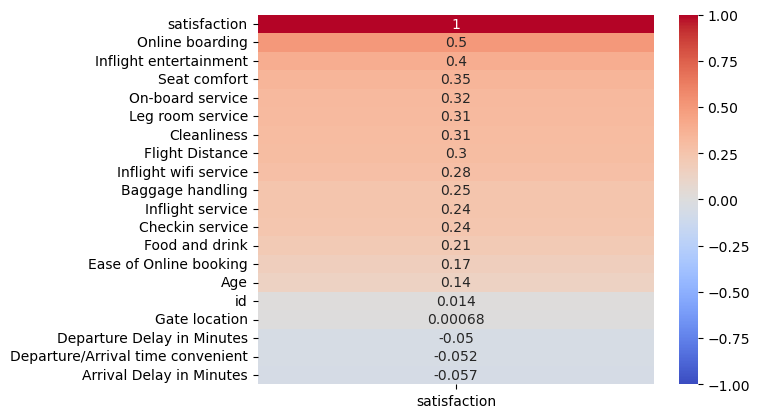

In [14]:
sns.heatmap(df.corr(numeric_only = True)[['satisfaction']].sort_values(by = 'satisfaction', ascending = False),
                                            annot = True,
                                            vmin= -1,
                                            vmax = 1,
                                            cmap = 'coolwarm');

In [15]:
# KNN

X = df[['Online boarding', 'Inflight entertainment', 'Seat comfort']]
y = df['satisfaction']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [17]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [18]:
knn = KNeighborsClassifier()

In [19]:
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [20]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [21]:
df['satisfaction'] = df['satisfaction'].fillna(df ['satisfaction'].mean())

In [22]:
knn.score(X_test_sc, y_test)

0.7938096704650447

In [23]:
knn.score(X_train_sc, y_train)

0.7979673544810595

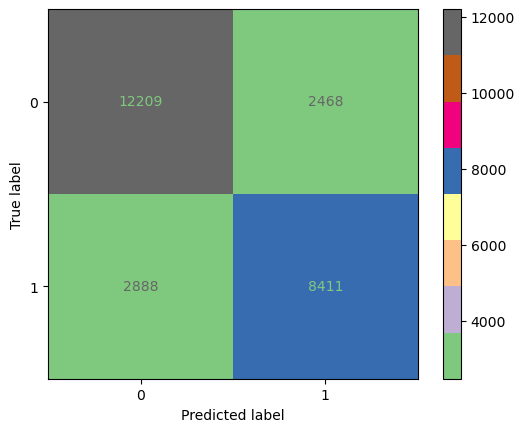

In [24]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Accent')

In [25]:
scores = []
for k in range (1, 32, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_sc, y_train)
    training_acc = knn.score(X_train_sc, y_train)
    testing_acc = knn.score(X_test_sc, y_test)
    scores.append({'k':k, 'Training Accuracy': training_acc, 'Testing Accuracy': testing_acc})

In [26]:
df_score = pd.DataFrame(scores)
df_score

,k,Training Accuracy,Testing Accuracy
0,1,0.757712,0.754042
1,3,0.811980,0.809016
2,5,0.797967,0.793810
3,7,0.797339,0.795581
4,9,0.799623,0.795196
5,11,0.798044,0.793733
6,13,0.800713,0.796966
7,15,0.818191,0.814521
8,17,0.815330,0.811672
9,19,0.822785,0.821643


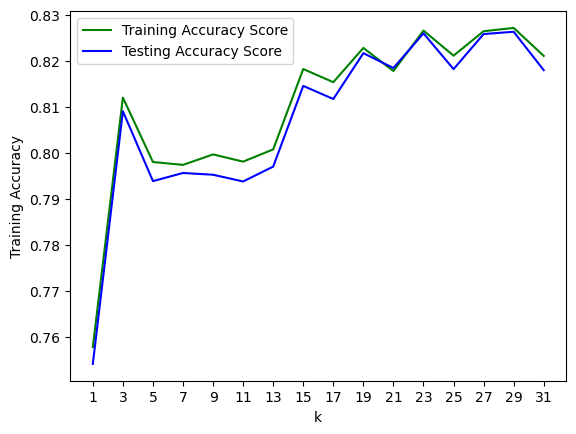

In [27]:
sns.lineplot(data = df_score,
             x = 'k',
             y = 'Training Accuracy',
             c ='green',
             label = 'Training Accuracy Score')
sns.lineplot(data = df_score,
             x = 'k',
             y = 'Testing Accuracy',
             c = 'blue',
             label = 'Testing Accuracy Score')
plt.xticks(range(1,32,2));

             

In [28]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

In [29]:
logr = LogisticRegression()
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [30]:
logr.score(X_train_sc, y_train)

0.7943229647880095

In [31]:
logr.score(X_test_sc, y_test)

0.7944256236526024

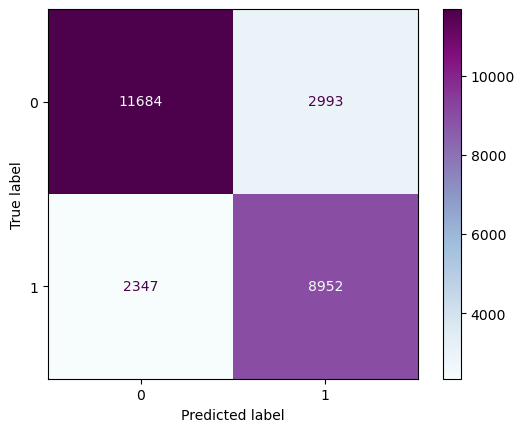

In [32]:
ConfusionMatrixDisplay.from_estimator(logr, X_test_sc, y_test, cmap = 'BuPu')

In [33]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [35]:
rf.score(X_train_sc, y_train)

0.8285596961297608

In [36]:
rf.score(X_test_sc, y_test)

0.827071142593163

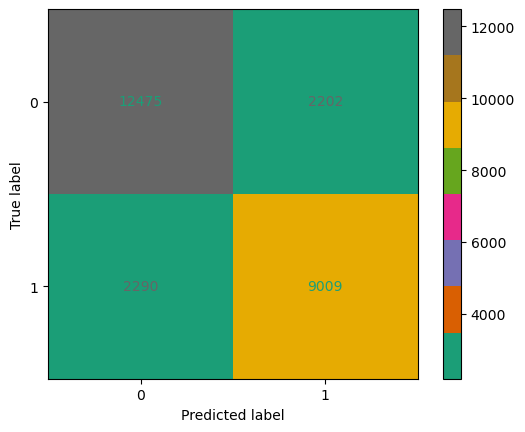

In [37]:
ConfusionMatrixDisplay.from_estimator(rf, X_test_sc, y_test, cmap = 'Dark2')

In [38]:
df.to_csv('data/new_train.csv',index = False)